In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from passenger import *


p = 1500
e = 20
f = 80
c = 'OptimisedDropOffController'
file = open('out_p{}e{}f{}c{}.bin'.format(p, e, f, c), 'rb')

db = pickle.load(file)
passengers = db['passengers']
file.close


p_dict = [vars(passenger) for passenger in passengers]


p_dict[0]


{'weight': 67.93861135305012,
 'route': [0, 35, 0],
 'floor': 0,
 'route_index': 2,
 'state': <States.Idle: 1>,
 'waitingTime': 704.5,
 'rideTime': 172.5}

In [2]:
data = pd.DataFrame.from_records(p_dict)
data

,weight,route,floor,route_index,state,waitingTime,rideTime
0,67.938611,"[0, 35, 0]",0,2,States.Idle,704.5,172.5
1,107.175362,"[0, 20, 4, 56, 41, 29, 0]",0,6,States.Idle,8447.5,404.5
2,93.382197,"[0, 79, 0]",0,2,States.Idle,120.5,341.5
3,122.945063,"[0, 26, 10, 77, 33, 0]",0,5,States.Idle,9190.5,1016.0
4,10.000000,"[0, 34, 0]",0,2,States.Idle,955.0,181.5
...,...,...,...,...,...,...,...
1495,78.229296,"[0, 53, 22, 1, 33, 0]",0,5,States.Idle,490.5,399.0
1496,170.000000,"[0, 59, 48, 25, 70, 0]",0,5,States.Idle,3818.0,669.5
1497,57.312862,"[0, 77, 67, 32, 17, 0]",0,5,States.Idle,400.5,718.5
1498,91.080338,"[0, 22, 1, 64, 41, 37, 0]",0,6,States.Idle,323.5,392.0


<AxesSubplot:ylabel='Frequency'>

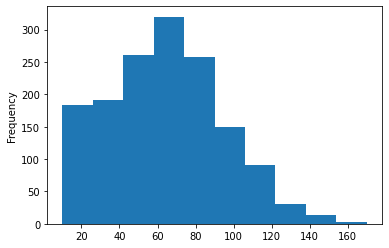

In [3]:
data['weight'].plot.hist(bins=10)

In [4]:
data['meanWait'] = data.waitingTime / data['route'].map(len)
data['meanTravel'] = data.rideTime / data['route'].map(len)

Text(0.5, 1.0, 'Wait Times Distribution (elevators=20, floors=80)')

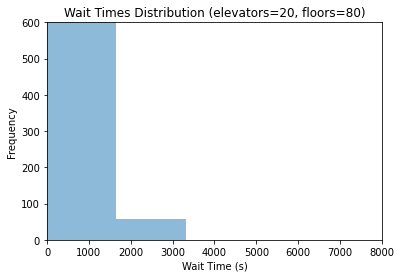

In [5]:
from cProfile import label


data.meanWait.plot.hist(alpha=0.5, bins=2)
# data.meanTravel.plot.hist(alpha=0.5)
# (data.meanWait + data.meanTravel).plot.hist(alpha=0.5, label="combined")
# plt.legend()
plt.xlabel('Wait Time (s)')
plt.xlim([0, 8000])
plt.ylim([0, 600])
plt.title('Wait Times Distribution (elevators={}, floors={})'.format(e, f))

In [6]:
data.meanWait.describe()

count    1500.000000
mean      467.180463
std       531.488384
min         0.333333
25%        66.883929
50%       247.125000
75%       727.625000
max      3317.166667
Name: meanWait, dtype: float64

Estimated throughput: 0.25305555555555553 0.13342085235920856


Text(0.5, 1.0, 'Throughput Curve (elevators=20, floors=80)')

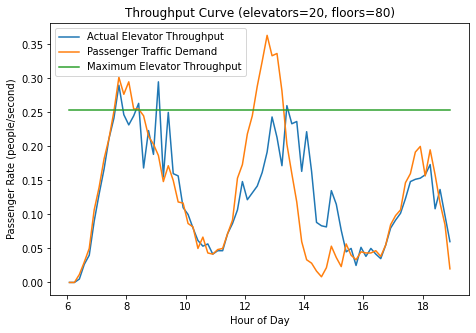

In [7]:
throughput = db['throughput']

hours_time = [x / (60*60) for x in throughput['timestamps']]


fig = plt.figure()
scale  = 1.6
fig.set_figwidth(12/scale)
fig.set_figheight(8/scale)

elevator_raw = pd.DataFrame(throughput['elevator']).rolling(6).mean()
apmean = [elevator_raw.mean()[0]] * len(throughput['timestamps'])
approx = [elevator_raw.max()[0]] * len(throughput['timestamps'])
plt.plot(hours_time, throughput['elevator'])
plt.plot(hours_time, throughput['demand'])
# plt.plot(throughput['timestamps'], elevator_raw)
plt.plot(hours_time, approx)
# plt.plot(throughput['timestamps'], apmean)
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Rate (people/second)')
print('Estimated throughput:', approx[0], apmean[0])
plt.legend(['Actual Elevator Throughput', 'Passenger Traffic Demand', 'Maximum Elevator Throughput'])
plt.title('Throughput Curve (elevators={}, floors={})'.format(e, f))
